<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/polyhedron-gdl/introduction-to-machine-learning-for-finance/blob/main/2022/1-notebooks/chapter-4-3.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Supervised Models: Support Vector Machines (SVM)

## Linear Classification

Machine learning involves predicting and classifying data and to do so we employ various machine learning algorithms according to the dataset.
SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. This chapter will primarily focus on how SVM works as a classifier. It classifies data points into two classes at a time(this does not mean it is only a binary classifier, it only separates data points into two classes at a time), using a decision boundary (a hyperplane in this case). The primary objective of the Support vector Classifier is finding the ‘Optimal Separating Hyperplane(Decision Boundary)’. 

At first approximation what SVMs do is to find a separating line(or hyperplane) between data of two classes. SVM is an algorithm that takes the data as an input and outputs a line that separates those classes if possible but in this case
our optimization objective is to maximize the margin. 

The margin is defined as the
distance between the separating hyperplane (decision boundary) and the training
examples that are closest to this hyperplane, which are the so-called **support vectors**.
This is illustrated in the following figure:

![image.png](./pic/chapter-4-3_pic_0.png)

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes (the margin) is as wide as possible.

### What is a Hyperplane?

In geometry, it is an n-dimensional generalization of a plane, a subspace with one less dimension $(n-1)$ than its origin space. In one-dimensional space, it is a point, In two-dimensional space it is a line, In three-dimensional space, it is an ordinary plane, in four or more dimensional spaces, it is then called a ‘Hyperplane’. Take note of this, it is really how the Support Vector Machine works behind the scenes, the dimensions are the features represented in the data. For example, say we want to carry out a classification problem and we want to be able to tell if a product gets purchased or not(a binary classification), if there is just one feature (say Gender) available as a feature in the dataset, then it is in one-dimensional space and the subspace (the separating/decision boundary) representation will be $(n-1=0)$ a 0-dimensional space, represented with just a point showing the separation of classes (Purchased or not). If there are two features(Age and Gender), it is a two-dimensional space (2D), with either of Age and Gender on the $X$ and $Y$-axis, the decision boundary will be represented as a simple line. Similarly, if the features are three(Age, Gender, Income), the decision boundary will be a two-dimensional plane in a three-dimensional space. Furthermore, if we have a four or more dimensional space data points, then it is called a ‘Hyperplane’ with $n-1$ dimension. 

The Hyperplane is simply a concept that separates an n-dimensional space into two groups/halves. In machine learning terms, it is a form of a decision boundary that algorithms like the Support Vector Machine uses to classify or separate data points. There are two parts to it, the negative side hyperplane and the positive part hyperplane, where data points/instances can lie on either part, signifying the group/class they belong to.

### Hard Margins

The rationale behind having decision boundaries with large margins is that they tend
to have a lower generalization error, whereas models with small margins are more
prone to overfitting. To get an idea of the margin maximization, let's take a closer
look at those positive and negative hyperplanes that are parallel to the decision
boundary. 

When the data is linearly separable, and we don’t want to have any misclassifications, we use SVM with a **hard margin**. However, when a linear boundary is not feasible, or we want to allow some misclassifications in the hope of achieving better generality, we can opt for a **soft margin** for our classifier.

...

![chapter-4-4_pic_10.png](./pic/chapter-4-3_pic_1.png)

We can scale $w_1$, $w_2$, $b_u$, and $b_d$  by the same constant without changing the model. We can therefore set $b_u=b+1$ and $b_d=b-1$ so that the width of the pathway is 

$$P = \frac{2}{\sqrt{w_1^2+w_2^2}} = \frac{2}{\vert\vert \mathbf{w} \vert\vert^2}$$
		
In the **hard margin** case the algorithm minimizes $w_1^2+w_2^2$ subject to \textbf{perfect separation} being achieved

Now, the objective function of the SVM becomes the maximization of this margin by maximizing $P$ under the constraint that the examples are classified correctly, which can be written as:

$$b + \mathbf{w}^𝑇 \cdot \mathbf{x}^{(𝑖)} \ge 1 \quad \text{if } 𝑦^{(𝑖)} = 1$$
$$b + \mathbf{w}^𝑇 \cdot \mathbf{x}^{(𝑖)} \le 1 \quad \text{if } 𝑦^{(𝑖)} = -1$$

for $𝑖 = 1, \dots, 𝑁$. Here, $N$ is the number of examples in our dataset.

These two equations basically say that all negative-class examples should fall on
one side of the negative hyperplane, whereas all the positive-class examples should
fall behind the positive hyperplane, which can also be written more compactly as
follows:

\begin{equation}
𝑦^{(𝑖)}\left(b + \mathbf{w}^𝑇 \cdot \mathbf{x}^{(𝑖)}\right) \ge 1 \quad \forall i
\end{equation}

In practice, though, it is easier to minimize the reciprocal term, $\frac{1}{2}\vert\vert\mathbf{w}\vert\vert^2$ , which can be solved by **quadratic programming**. 

### Lagrange Multiplier

Because we have a contrained optimization problem (with inequality contraints) we can recast the problem using Lagrange multipliers, $\alpha \ge 0$ and search for the critical points of 

\begin{equation}\label{eq:7.7}
L = \frac{1}{2} \vert \theta \vert^2 - \sum\limits_{n=1}^N \alpha_n \left( y^{(n)} \left( \mathbf{\theta}^T \mathbf{x}^{(n)} + \theta_0 \right) -1 \right)
\end{equation}

To find the critical points we differentiate with respect to the scalar $\theta_0$ and with respect to the vector $\mathbf{\theta}$. Remember that differentiation with respect to a vector just means differentiating with respect to each of its entries. Setting these derivatives to zero you end up with:

\begin{equation}\label{eq:7.8}
\sum\limits_{n=1}^N \alpha_n  y^{(n)} = 0
\end{equation}

and 

\begin{equation}\label{eq:7.9}
\mathbf{\theta} = \sum\limits_{n=1}^N \alpha_n  y^{(n)} \mathbf{x}^{(n)} 
\end{equation}

which means that our vector orthogonal to the hyperplane is just a linear combination of sample vectors. Substituting \eqref{eq:7.9} into \eqref{eq:7.7}  and using \eqref{eq:7.8} results in 

\begin{equation}
L = \sum\limits_{n=1}^N \alpha_n - \frac{1}{2} \sum\limits_{i=1}^N \sum\limits_{j=1}^N \alpha_i \alpha_j y^{(i)} 
{\mathbf{x}^{(i)}}^T \mathbf{x}^{(j)} 
\end{equation}

We want to maximize $L$ over the $\alpha$s, all greater than or equal to zero, subject to \eqref{eq:7.8}. This is known as the dual problem.


Once we have found the $\alpha$s the dual version of the classifier for a new point $\mathbf{u}$ is the just
\begin{equation}
\sum\limits_{n=1}^N \alpha_n   y^{(n)} {\mathbf{x}^{(n)}}^T  \mathbf{u} + \theta_0
\end{equation}

whether this is greater or less than zero.

### Soft Margins



Let's briefly mention the slack
variable, $\xi$ , which was introduced by Vladimir Vapnik in 1995 and led to the socalled
soft-margin classification. The motivation for introducing the slack variable, $\xi$ , 
was that the linear constraints need to be relaxed for nonlinearly separable data to
allow the convergence of the optimization in the presence of misclassifications, under
appropriate cost penalization.

The positive-valued slack variable is simply added to the linear constraints:

$$b + \mathbf{w}^𝑇 \cdot \mathbf{x}^{(𝑖)} \ge 1  - \xi^{(i)}\quad \text{if } 𝑦^{(𝑖)} = 1$$

$$b + \mathbf{w}^𝑇 \cdot \mathbf{x}^{(𝑖)} \le -1  + \xi^{(i)}\quad \text{if } 𝑦^{(𝑖)} = -1$$

So, the new objective to be minimized (subject to the contraints) becomes

\begin{equation}
\frac{1}{2} \vert\vert \mathbf{w} \vert\vert^2 + C \left( \sum_i \xi^{(i)} \right)
\end{equation}

Via the variable, C, we can then control the penalty for misclassification. Large
values of C correspond to large error penalties, whereas we are less strict about
misclassification errors if we choose smaller values for C. We can then use the C
parameter to control the width of the margin and therefore tune the bias-variance
tradeoff.

![image.png](./pic/chapter-4-3_pic_2.png)

## Example 1

In [1]:
# This section carries out calculations for the example in Table 5.2 of Chapter 5 Hull J. C.

In [2]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Income = pd.DataFrame([30, 55, 63, 35, 28, 140, 100, 95, 64, 63])
Credit = pd.DataFrame([40, 30, 30, 80, 100, 30, 30, 90, 120, 150])
Loan   = pd.DataFrame([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

c = []
for x in Loan[0]:
    if x == 0: 
        cc='red'
    else:    
        cc='green'
    c.append(cc)

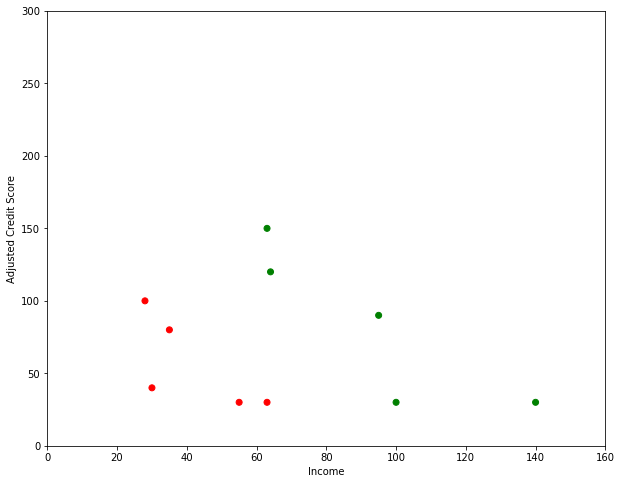

In [4]:
plt.figure(figsize=(10,8))

plt.scatter(Income, Credit, c=c)

plt.xlabel('Income')
plt.ylabel('Adjusted Credit Score')

axes = plt.gca()
axes.set_xlim([0,160])
axes.set_ylim([0,300])

plt.show()

### Hard Margin Calculation

In [5]:
X = np.asarray(pd.concat([Income, Credit],axis=1))
X

array([[ 30,  40],
       [ 55,  30],
       [ 63,  30],
       [ 35,  80],
       [ 28, 100],
       [140,  30],
       [100,  30],
       [ 95,  90],
       [ 64, 120],
       [ 63, 150]])

In [6]:
y = np.asarray(Loan).ravel()
y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [7]:
clf = SVC(kernel='linear',tol=1e-5)

In [8]:
clf.fit(X,y)

SVC(kernel='linear', tol=1e-05)

In [9]:
w = clf.coef_[0]
b = -clf.intercept_[0]
print(w)
print(b)

[0.05405405 0.02162159]
5.054052228526239


The outer lines are $w_1x_1+w_2x_2 = b_u$ and $w_1x_1+w_2x_2=b_d$.  The middle line is $w_1x_1+w_2x_2=b$, where $b_u=b+1$ and $b_d=b-1$.  The width of the path is $\frac{2}{\sqrt{w_1^2+w_2^2}}$.

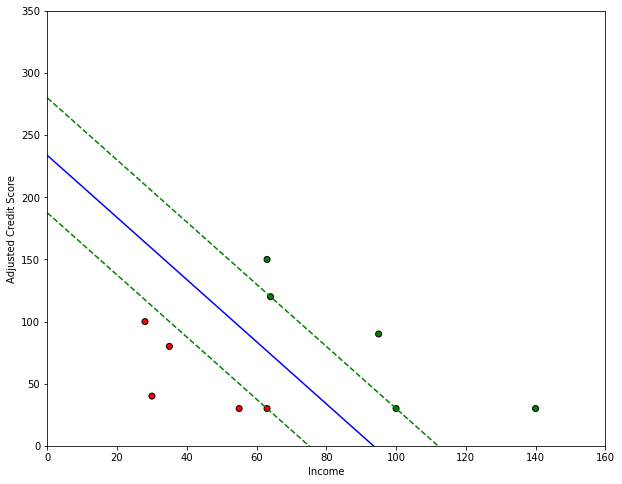

In [10]:
x1 = np.linspace(0,160,300)
w1 = w[0]
w2 = w[1]
bu = b+1
bd = b-1
y1 = (bu-w1*x1)/w2
y2 = (bd-w1*x1)/w2
y0 = (b-w1*x1)/w2

plt.figure(figsize=(10,8))

plt.scatter(Income, Credit, c=c, edgecolor='black')

plt.plot(x1,y1,'--',color='green')
plt.plot(x1,y2,'--',color='green')
plt.plot(x1,y0,'-' ,color='blue')

plt.xlabel('Income')
plt.ylabel('Adjusted Credit Score')

axes = plt.gca()
axes.set_xlim([0, 160])
axes.set_ylim([0, 350])

plt.show()

### Modification for Soft Margin

Note that the objective function of SVC is $C\sum_{j=1}^n z_j+\frac{1}{2}\sum_{j=1}^nw_j^2$.   If our objective function is $C\sum_{j=1}^n z_j+\sum_{j=1}^nw_j^2$, then we to set $C=C/2$ in SVC.

In [11]:
#We carry out calculations for C=0.0005 which corresponds to C=0.001 in Hull's book. 
X = np.asarray(pd.concat([Income, Credit],axis=1))
y = np.asarray(Loan).ravel()
clf = SVC(kernel='linear',C=0.0005,tol=1e-5)
clf.fit(X,y)

SVC(C=0.0005, kernel='linear', tol=1e-05)

In [12]:
w = clf.coef_[0]
b = -clf.intercept_[0]
print(w)
print(b)

[0.03678097 0.0142146 ]
3.449391592920354


The outer lines are $w_1x_1+w_2x_2 = b_u$ and $w_1x_1+w_2x_2=b_d$.  The middle line is $w_1x_1+w_2x_2=b$, where $b_u=b+1$ and $b_d=b-1$.  The width of the path is $\frac{2}{\sqrt{w_1^2+w_2^2}}$.

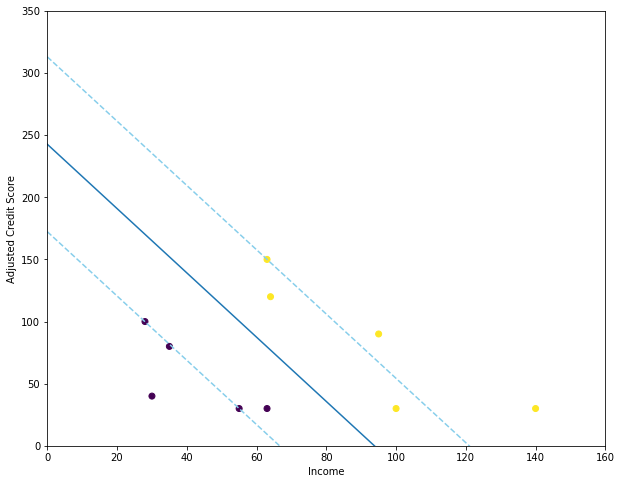

In [13]:
x1 = np.linspace(0,160,100)
w1 = w[0]
w2 = w[1]
bu = b+1
bd = b-1
y1 = (bu-w1*x1)/w2
y2 = (bd-w1*x1)/w2
y0 = (b-w1*x1)/w2
plt.figure(figsize=(10,8))
plt.scatter(Income, Credit, c=Loan)
plt.plot(x1,y1,'--',color='skyblue')
plt.plot(x1,y2,'--',color='skyblue')
plt.plot(x1,y0,'-')
plt.xlabel('Income')
plt.ylabel('Adjusted Credit Score')
axes = plt.gca()
axes.set_xlim([0,160])
axes.set_ylim([0, 350])
plt.show()

For different values of $C$ and find out the loans misclassified as well as width of pathway

In [14]:
# The values of C are those in Hull's book. We divide them by 2 to get corresponding values for Sklearn
for C in [0.01, 0.001, 0.0005, 0.0003, 0.0002]:
    clf = SVC(kernel='linear',C=C/2,tol=1e-6)
    clf.fit(X,y)
    S = clf.score(X,y)
    w = clf.coef_[0]
    b = -clf.intercept_[0]
    P = 2/np.sqrt(w[0]**2+w[1]**2)
    sum = 0
    for i in range(len(Income)):
        if Loan.iloc[i,0] == 0:
            sum += max(w[0] * Income.iloc[i,0] + w[1] * Credit.iloc[i,0] - b,0)
        else:
            sum += max(b- w[0] * Income.iloc[i,0] - w[1] * Credit.iloc[i,0],0)
    print("C = %6.4f, w1 = %6.4f, w2 = %6.4f, b = %5.2f, Loan Misclassified = %3.0f%%, Width = %5.1f, Cent Error = %6.4f" %(C,w[0],w[1],b,100*(1-S),P,sum))

C = 0.0100, w1 = 0.0541, w2 = 0.0216, b =  5.05, Loan Misclassified =   0%, Width =  34.4, Cent Error = 0.0000
C = 0.0010, w1 = 0.0368, w2 = 0.0142, b =  3.45, Loan Misclassified =   0%, Width =  50.7, Cent Error = 0.0000
C = 0.0005, w1 = 0.0290, w2 = 0.0155, b =  3.15, Loan Misclassified =   0%, Width =  60.9, Cent Error = 0.0000
C = 0.0003, w1 = 0.0235, w2 = 0.0151, b =  2.75, Loan Misclassified =   0%, Width =  71.5, Cent Error = 0.0000
C = 0.0002, w1 = 0.0193, w2 = 0.0124, b =  2.07, Loan Misclassified =   0%, Width =  87.2, Cent Error = 0.0000


In [15]:
#We carry out calculations for C=0.00015 which corresponds to C=0.0003 in Hull's book. 
X = np.asarray(pd.concat([Income, Credit],axis=1))
y = np.asarray(Loan).ravel()
clf = SVC(kernel='linear',C=0.00015,tol=1e-5)
clf.fit(X,y)

SVC(C=0.0001, kernel='linear', tol=1e-05)

In [16]:
w = clf.coef_[0]
b = -clf.intercept_[0]
print(w)
print(b)

[0.01930812 0.0123893 ]
2.0748126883929943


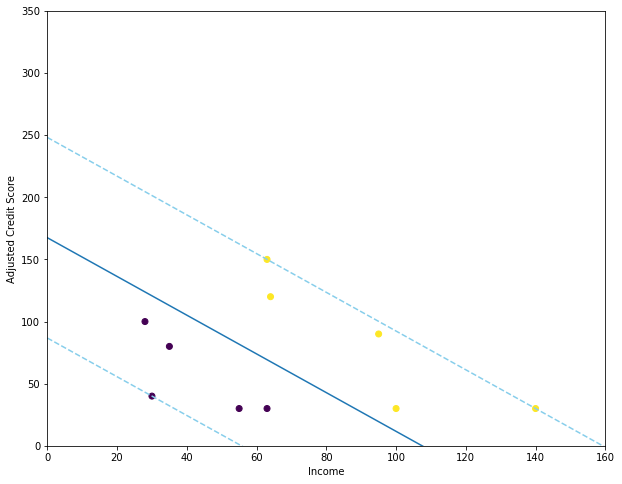

In [17]:
x1 = np.linspace(0,160,100)
w1 = w[0]
w2 = w[1]
bu = b+1
bd = b-1
y1 = (bu-w1*x1)/w2
y2 = (bd-w1*x1)/w2
y0 = (b-w1*x1)/w2
plt.figure(figsize=(10,8))
plt.scatter(Income, Credit, c=Loan)
plt.plot(x1,y1,'--',color='skyblue')
plt.plot(x1,y2,'--',color='skyblue')
plt.plot(x1,y0,'-')
plt.xlabel('Income')
plt.ylabel('Adjusted Credit Score')
axes = plt.gca()
axes.set_xlim([0,160])
axes.set_ylim([0, 350])
plt.show()

## Example 2

### The Iris Dataset

he Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. (from Wikipedia)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [20]:
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features
y = iris.target

In [23]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X, y)

In [24]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

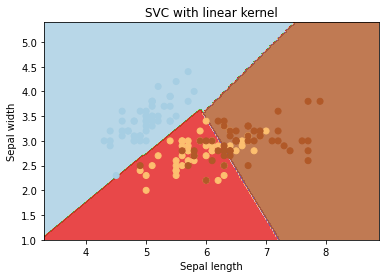

In [26]:
plt.subplot(1, 1, 1)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()